# Mother Nature 🌳

### Fall 2024 CMSC320 Data Science Project!

## Contributions

- **Evan Thompson**: Setup GitHub repository, helped with project idea, data explanation, and explored dataset using a regression model with accompanying visuals. Cleaned the Global Land Temperature dataset, and utilized the T-test and analyzed those results. 
- **Feenet Oli**: Helped with project idea, data explanation, and regression model visualization. Cleaned the Global Country Information dataset, and utilized the Anova test and analyzed its results. 
- **Ari Kaplan**: Wrote and formatted introduction, data curation, analysis of visualizations, and final insights and conclusions. Cleaned City Daily Temperature dataset, and utilized Chi-squared test and analyzed those results. 

<div style="text-align: center;">
    <img src="https://media.giphy.com/media/lKXEBR8m1jWso/giphy.gif" width="300" />
</div>

# Introduction

## Topic ⛈️🌡️🔥
Climate, Temperature, and Global Warming

### Our Project: <br>
With our project, we wanted to take a look at climate, temperature, and certain factors like CO2 emissions from different countries over recent years in order to answer some of the following questions: <br>
- Which regions of the world have experienced the most significant change in temperature and climate over time?
- What are the correlations between temperature changes and country-specific emissions data? <br> <br> 
and the **big question** <br> <br>
**Which area of the world is most responsible for Global Warming?** <br> <br>
We find that this topic, and these questions, are worth researching and looking into because global warming is an ongoing issue that is causing irreversible damage to our ecosystem. Researching the root of global warming can highlight major contributing countries, and our analysis hopes to understand the global environmental crisis with tangible data and visualizations.

<div style="text-align: center;">
    <img src="https://media.tenor.com/tWD3GjJcoHgAAAAM/spongebob-computer.gif" width="450" />
</div>

# (Cleaning) Our DATA! 📈🫧 

<div style="text-align: center;">
    <img src="https://media.tenor.com/gxadvMgrrNYAAAAM/patrick-cleaning.gif" width="550" />
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

city_daily_temperature_df = pd.read_csv("Datasets/city-daily-temperature.csv")
global_land_temperature_df = pd.read_csv("Datasets/global_land_temperatures_by_country.csv")
global_country_info_df = pd.read_csv("Datasets/global-country-information.csv")

/var/folders/lb/lh1tm_b96cj5w3fqx388s3_r0000gn/T/ipykernel_50478/1087545288.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  city_daily_temperature_df = pd.read_csv("Datasets/city-daily-temperature.csv")


### City Daily Temperature Dataset

For this [dataset](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities), it exclusively looks at the temperature of major cities around the world. Since global warming is defined as the ongoing rise of average temperature of the Earth's climate system. This data would help us directly analyze and correlate what cities, and areas of the world, are more, or less, responsible for this rise in temperature. We organized our data by date, city, and its average temperature.

In [ ]:
# Preprocessing City Daily Temperature
city_daily_temperature_df.drop(['State'], axis = 1, inplace = True)
# We are considering temperatures for years between 2000 and 2019 since 2020 was an outlier year for temperatures
city_daily_temperature_df = city_daily_temperature_df[city_daily_temperature_df['Year'].between(2000, 2019)]

# Filtering invlaid temperatures
city_daily_temperature_df = city_daily_temperature_df[city_daily_temperature_df['AvgTemperature'] <= 134]
city_daily_temperature_df = city_daily_temperature_df[city_daily_temperature_df['AvgTemperature'] != -99]

# Renaming countries
country_remappings = {
    'Congo': 'Democratic Republic of the Congo', 
    'US': 'United States',
    'The Netherlands' : 'Netherlands',
    'Equador' : 'Ecuador',
    'Myanmar (Burma)' : 'Myanmar',
    'Serbia-Montenegro' : 'Montenegro'
}
city_daily_temperature_df['Country'] = city_daily_temperature_df['Country'].replace(country_remappings)

# Grouping data 
avg_temp_per_year = city_daily_temperature_df.groupby('Year')['AvgTemperature'].mean().reset_index()
avg_temp_per_region_per_year = city_daily_temperature_df.groupby(['Region', 'Year'])['AvgTemperature'].mean().reset_index()
avg_temp_per_country_per_year = city_daily_temperature_df.groupby(['Country', 'Year'])['AvgTemperature'].mean().reset_index()
avg_temp_per_country_per_month = city_daily_temperature_df.groupby(['Country', 'Month'])['AvgTemperature'].mean().reset_index()

print(f"Unique countries: {city_daily_temperature_df['Country'].unique()}")
city_daily_temperature_df

Unique countries: ['Algeria' 'Burundi' 'Benin' 'Central African Republic'
 'Democratic Republic of the Congo' 'Egypt' 'Ethiopia' 'Gabon' 'Gambia'
 'Guinea' 'Guinea-Bissau' 'Ivory Coast' 'Kenya' 'Morocco' 'Madagascar'
 'Mauritania' 'Malawi' 'Mozambique' 'Namibia' 'Nigeria' 'Senegal'
 'Sierra Leone' 'South Africa' 'Togo' 'Tunisia' 'Tanzania' 'Uganda'
 'Zambia' 'Bangladesh' 'China' 'Hong Kong' 'India' 'Indonesia' 'Japan'
 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Malaysia' 'Mongolia' 'Myanmar' 'Nepal'
 'North Korea' 'Pakistan' 'Philippines' 'Singapore' 'South Korea'
 'Sri Lanka' 'Taiwan' 'Tajikistan' 'Thailand' 'Turkmenistan' 'Uzbekistan'
 'Vietnam' 'Australia' 'New Zealand' 'Albania' 'Austria' 'Belarus'
 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Georgia' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Macedonia' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russia' 'Montenegro' 'Slovakia' 'Spain' 'Sweden'
 'Switzerland' '

,Region,Country,City,Month,Day,Year,AvgTemperature
1826,Africa,Algeria,Algiers,1,1,2000,43.9
1827,Africa,Algeria,Algiers,1,2,2000,46.5
1828,Africa,Algeria,Algiers,1,3,2000,46.1
1829,Africa,Algeria,Algiers,1,4,2000,45.7
1830,Africa,Algeria,Algiers,1,5,2000,46.2
...,...,...,...,...,...,...,...
2906322,North America,United States,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,United States,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,United States,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,United States,San Juan Puerto Rico,7,30,2013,83.8


: 

### Global Land Temperature Dataset

For this [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023), we organized it to focus on the average temperature of the countries for any given year. With this, we can analyze the trends of climate and temperature on a broader scale, by looking at countries. We specifically narrowed it down to two variables, the average temperature and its uncertainty for any given country.

In [ ]:
# Preprocessing City Daily Temperature
global_land_temperature_df.dropna(inplace=True)

# Converting Temperatures from Celcius to Fahrenheit
global_land_temperature_df['AverageTemperature'] = global_land_temperature_df['AverageTemperature'] * 9/5 + 32

# Remapping Countries
country_remappings = {
    'Antigua And Barbuda': 'Antigua and Barbuda', 
    'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
    'Ireland': 'Republic of Ireland',
    'Congo (Democratic Republic Of The)': 'Democratic Republic of the Congo',
    'Federated States Of Micronesia': 'Federated States of Micronesia',
    'Guinea Bissau': 'Guinea-Bissau',
    'Macedonia': 'North Macedonia',
    'Saint Kitts And Nevis': 'Saint Kitts and Nevis',
    'Saint Vincent And The Grenadines': 'Saint Vincent and the Grenadines',
    'Sao Tome And Principe': 'São Tomé and Príncipe',
    'Bahamas': 'The Bahamas',
    'Gambia': 'The Gambia',
    'Trinidad And Tobago': 'Trinidad and Tobago',
    'Timor Leste': 'East Timor',
    'Congo': 'Republic of the Congo'
}
global_land_temperature_df['Country'] = global_land_temperature_df['Country'].replace(country_remappings)
global_land_temperature_df["Country"].unique()

# Removing data for years before 1890
global_land_temperature_df.rename(columns={'dt': 'Date'}, inplace=True)
global_land_temperature_df["Date"] = pd.to_datetime(global_land_temperature_df["Date"])
start_date = pd.to_datetime('1890-01-01')
global_land_temperature_df = global_land_temperature_df[global_land_temperature_df["Date"] >= start_date]

global_land_temperature_df.isna().sum() / global_land_temperature_df.count()
global_land_temperature_df.index = range(1, len(global_land_temperature_df) + 1)

avg_global_land_temp_per_country = global_land_temperature_df.groupby(['Country', global_land_temperature_df['Date'].dt.year])['AverageTemperature'].mean()

global_land_temperature_df

,Date,AverageTemperature,AverageTemperatureUncertainty,Country
1,1890-01-01,33.9674,0.873,Åland
2,1890-02-01,29.5358,1.056,Åland
3,1890-03-01,32.5382,1.056,Åland
4,1890-04-01,36.9788,0.792,Åland
5,1890-05-01,47.9660,0.860,Åland
...,...,...,...,...
357182,2013-04-01,70.0556,0.495,Zimbabwe
357183,2013-05-01,66.3062,1.022,Zimbabwe
357184,2013-06-01,63.7034,0.473,Zimbabwe
357185,2013-07-01,62.6000,0.453,Zimbabwe


: 

### Global Country Information Dataset

For our third and final [dataset](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data), we looked at a comprehensive dataset containing a wide range of information about all countries worldwide. This is where we did a lot of cleaning, as we only wanted to look at a few of the attributes that this dataset provided. In specific, we looked at things like population, GDP, area, birth rate, infant mortality, life expectancy, and Co2-emissions.

In [ ]:
# Preprocessing Global Country Information
# pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)
pd.options.mode.chained_assignment = None

#---------------------DROPPING UNNECESSARY COLUMNS---------------------
global_country_info_df.drop(['Fertility Rate','Population: Labor force participation (%)','Maternal mortality ratio','Unemployment rate','Gross tertiary education enrollment (%)','Gross primary education enrollment (%)','Density\n(P/Km2)','CPI','Abbreviation','Gasoline Price','Armed Forces size','CPI Change (%)','Latitude','Longitude','Tax revenue (%)','Calling Code','Currency-Code','Official language','Total tax rate', 'Physicians per thousand', 'Minimum wage', 'Out of pocket health expenditure',], axis = 1, inplace = True)

#---------------------FIXING COUNTIRES NAME ISSUES---------------------
global_country_info_df.loc[150, ['Country', 'Largest city', 'Capital/Major City']] = ['São Tomé and Príncipe', 'São Tomé', 'São Tomé']
global_country_info_df.loc[176, ['Capital/Major City', 'Largest city']] = ['Nuku\'alofa', 'Nuku\'alofa']
global_country_info_df.loc[181, 'Largest city'] = 'Funafuti'
global_country_info_df.loc[156, ['Capital/Major City', 'Largest city']] = ['Singapore', 'Singapore']
global_country_info_df.loc[97, ['Capital/Major City', 'Largest city']] = ['Tripoli', 'Tripoli']
global_country_info_df.loc[24, 'Largest city'] = 'Bandar Seri Begawan'
global_country_info_df.loc[120, 'Largest city'] = 'Denigomodu'
global_country_info_df.loc[175, ['Capital/Major City', 'Largest city']] = ['Lomé', 'Lomé']
global_country_info_df.loc[37, ['Capital/Major City', 'Largest city']] = ['Bogotá', 'Bogotá']
global_country_info_df.loc[40, ['Capital/Major City', 'Largest city']] = ['San José', 'San José']
global_country_info_df.loc[76, ['Capital/Major City', 'Largest city']] = ['Reykjavík', 'Reykjavík']
global_country_info_df.loc[104, ['Capital/Major City', 'Largest city']] = ['Malé', 'Malé']
global_country_info_df.loc[112, ['Capital/Major City', 'Largest city']] = ['Chișinău', 'Chișinău']
global_country_info_df.loc[23, ['Capital/Major City', 'Largest city']] = ['Brasília', 'São Paulo']
global_country_info_df.loc[31, ['Capital/Major City']] = ['Yaoundé']
global_country_info_df.loc[136, ['Capital/Major City']] = ['Asunción']
global_country_info_df.loc[43, ['Largest city']] = ['Nicosia']
global_country_info_df.loc[168, ['Largest city']] = ['Stockholm']
global_country_info_df.loc[169, ['Largest city']] = ['Zurich']
global_country_info_df.drop([133, 73], inplace=True) # Getting rid of countrys where majority/all of the data is missing

global_country_info_df['Population'] = global_country_info_df['Population'].str.replace(',', '', regex=False).astype(int)
global_country_info_df['GDP'] = global_country_info_df['GDP'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)
global_country_info_df['Agricultural Land( %)'] = pd.to_numeric(global_country_info_df['Agricultural Land( %)'].str.replace('%', ''), errors='coerce')
global_country_info_df['Forested Area (%)'] = pd.to_numeric(global_country_info_df['Forested Area (%)'].str.replace('%', ''), errors='coerce')

#---------------------FIXING MISSING CO2-EMMISIONS IN DATAFRAME---------------------
def replace_missing_co2(df):
    for index, row in df[df['Co2-Emissions'].isna()].iterrows():
        closest_country = df.loc[df['Co2-Emissions'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP']) 
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Co2-Emissions'] = closest_row['Co2-Emissions']    
    return df

#---------------------FIXING MISSING BIRTH RATES IN DATAFRAME---------------------
def replace_missing_birth_rate(df):
    for index, row in df[df['Birth Rate'].isna()].iterrows():
        closest_country = df.loc[df['Birth Rate'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP'])  # GDP is now a float
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Birth Rate'] = closest_row['Birth Rate']    
    return df

#---------------------FIXING MISSING URBAN POPULATION IN DATAFRAME---------------------
def replace_missing_urban(df):
    df['Urban_population'] = pd.to_numeric(df['Urban_population'].str.replace(',', ''), errors='coerce')
    for index, row in df[df['Urban_population'].isna()].iterrows():
        closest_country = df.loc[(df['Urban_population'].notna()) &  (df['Urban_population'] < df['Population']) & (df['Population'].notna()) ] 
        if closest_country.empty:
            continue  
        population_diff = closest_country['Population'] - row['Population']
        gdp_diff = closest_country['GDP'] - row['GDP'] 
        combined_diff = population_diff + gdp_diff
        sorted_indices = combined_diff.sort_values().index
        for idx in sorted_indices:
            closest_row = closest_country.loc[idx]
            if closest_row['Urban_population'] < row['Population']:
                df.at[index, 'Urban_population'] = closest_row['Urban_population']
                break
    return df

#---------------------FIXING MISSING LIFE EXPECTANCY IN DATAFRAME---------------------
def replace_missing_life_expectancy(df):
    for index, row in df[df['Life expectancy'].isna()].iterrows():
        closest_country = df.loc[df['Life expectancy'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP'])  
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Life expectancy'] = closest_row['Life expectancy']    
    return df

#---------------------FIXING MISSING INFANT MORTALITY IN DATAFRAME---------------------
def replace_missing_infant_mortality(df):
    for index, row in df[df['Infant mortality'].isna()].iterrows():
        closest_country = df.loc[df['Infant mortality'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP'])  
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Infant mortality'] = closest_row['Infant mortality']    
    return df

#---------------------FIXING MISSING INFANT MORTALITY IN DATAFRAME---------------------
def replace_missing_land(df):
    for index, row in df[df['Agricultural Land( %)'].isna()].iterrows():
        closest_country = df.loc[df['Agricultural Land( %)'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP']) 
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Agricultural Land( %)'] = closest_row['Agricultural Land( %)']
        df.at[index, 'Forested Area (%)'] = closest_row['Forested Area (%)']         
    return df

#---------------------FIXING PERCENTAGES IN DATAFRAME---------------------
def correct_land_percentages(global_country_info_df):
    rows_to_replace = global_country_info_df[(global_country_info_df['Agricultural Land( %)'] + global_country_info_df['Forested Area (%)']) > 100]
    for index, row in rows_to_replace.iterrows():
        closest_country = global_country_info_df.loc[(global_country_info_df['Agricultural Land( %)'].notna()) & (global_country_info_df['Forested Area (%)'].notna()) & (global_country_info_df.index != index) & ((global_country_info_df['Agricultural Land( %)'] + global_country_info_df['Forested Area (%)']) <= 100)]
        population_diff = abs(closest_country['Population'] - row['Population'])
        land_diff = abs((closest_country['Agricultural Land( %)'] + closest_country['Forested Area (%)']) - 100)
        combined_diff = population_diff + land_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        global_country_info_df.at[index, 'Agricultural Land( %)'] = closest_row['Agricultural Land( %)']
        global_country_info_df.at[index, 'Forested Area (%)'] = closest_row['Forested Area (%)']
    return global_country_info_df

global_country_info_df = replace_missing_co2(global_country_info_df)
global_country_info_df = replace_missing_birth_rate(global_country_info_df)
global_country_info_df = replace_missing_urban(global_country_info_df)
global_country_info_df = replace_missing_life_expectancy(global_country_info_df)
global_country_info_df = replace_missing_infant_mortality(global_country_info_df)
global_country_info_df = replace_missing_land(global_country_info_df)
global_country_info_df = correct_land_percentages(global_country_info_df)
global_country_info_df['Land Area(Km2)'] = global_country_info_df['Land Area(Km2)'].str.replace(',', '', regex=False).astype(int)
global_country_info_df['Co2-Emissions'] = global_country_info_df['Co2-Emissions'].str.replace(',', '', regex=False).astype(int)
global_country_info_df['Urban_population'] = global_country_info_df["Urban_population"].astype(int)
global_country_info_df = global_country_info_df.sort_values(by='Co2-Emissions', ascending=False)
global_country_info_df = global_country_info_df[['Country','Capital/Major City','Largest city','Population','Urban_population','GDP','Land Area(Km2)','Agricultural Land( %)','Forested Area (%)','Birth Rate','Infant mortality','Life expectancy','Co2-Emissions']]
global_country_info_df = global_country_info_df.reset_index(drop=True)
global_country_info_df.index = range(1, len(global_country_info_df) + 1)
global_country_info_df

,Country,Capital/Major City,Largest city,Population,Urban_population,GDP,Land Area(Km2),Agricultural Land( %),Forested Area (%),Birth Rate,Infant mortality,Life expectancy,Co2-Emissions
1,China,Beijing,Shanghai,1397715000,842933962,19910000000000,9596960,56.2,22.4,10.90,7.4,77.0,9893038
2,United States,"Washington, D.C.",New York City,328239523,270663028,21427700000000,9833517,44.4,33.9,11.60,5.6,78.5,5006302
3,India,New Delhi,Kurebhar,1366417754,471031528,2611000000000,3287263,60.4,23.8,17.86,29.9,69.4,2407672
4,Russia,Moscow,Moscow,144373535,107683889,1699876578871,17098240,13.3,49.8,11.50,6.1,72.7,1732027
5,Japan,Tokyo,Tokyo,126226568,115782416,5081769542380,377944,12.3,68.5,7.40,1.8,84.2,1135886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,São Tomé and Príncipe,São Tomé,São Tomé,215056,158277,429016605,964,12.4,60.4,31.54,24.4,70.2,121
190,Kiribati,South Tarawa,South Tarawa,117606,64489,194647202,811,42.0,15.0,27.89,41.2,68.1,66
191,Nauru,Yaren District,Denigomodu,10084,7362,133000000,21,42.0,15.0,27.89,41.2,68.1,66
192,Liechtenstein,Vaduz,Schaan,38019,5464,6552858739,160,32.2,43.1,9.90,2.6,83.0,51


: 

In [ ]:
# Combining the yearly average temperatures by country with the global country information
combined_yearly_df = pd.merge(global_country_info_df, global_land_temperature_df, on='Country')
combined_yearly_df['Date'] = pd.to_datetime(combined_yearly_df['Date'])
combined_yearly_df.groupby(["Population", "Country"], group_keys=False)["AverageTemperature"].mean()


Population  Country              
18233       Palau                    81.067341
33860       San Marino               57.302931
38019       Liechtenstein            40.794138
38964       Monaco                   48.675029
52823       Saint Kitts and Nevis    78.812658
                                       ...    
216565318   Pakistan                 69.375105
270203917   Indonesia                78.455124
328239523   United States            48.023777
1366417754  India                    75.425876
1397715000  China                    44.277703
Name: AverageTemperature, Length: 183, dtype: float64

: 

In [ ]:
# Combining the monthly average temperatures with the global country information
month_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
combined_monthly_df = pd.merge(global_country_info_df, avg_temp_per_country_per_month, on='Country')
combined_monthly_df['Month'] = combined_monthly_df['Month'].replace(month_dict)

: 

## Now our data is clean! 🫧 

<div style="text-align: center;">
    <img src="https://media1.giphy.com/media/3ogwFGizf7RoJ9eHm0/giphy.gif?cid=6c09b952sdb8bbx62u4lm30rsmeok7wfgovz260o9s7tmuan&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g" width="400" />
</div>

## Our Tests 📝

### ANOVA Test

p-value: 1.3352258898040644e-05


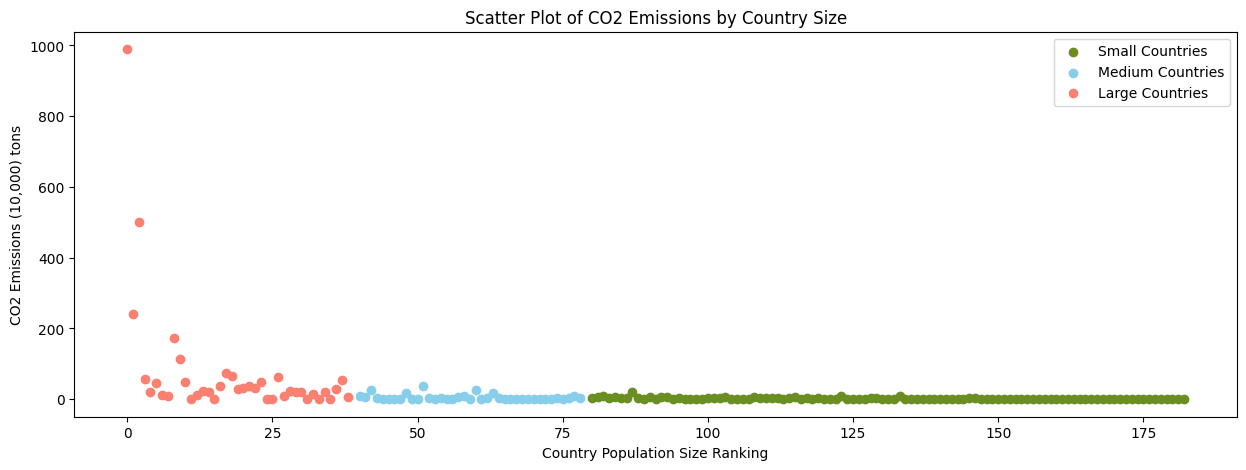

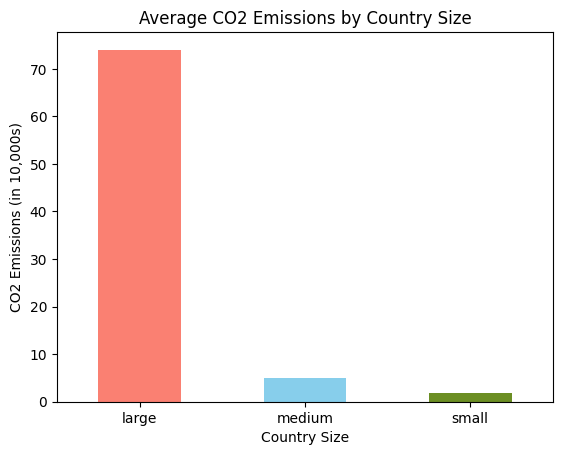

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 large medium -68.9417 0.0006 -112.0914 -25.7921   True
 large  small -72.0899    0.0 -107.9151 -36.2648   True
medium  small  -3.1482 0.9765  -38.9734  32.6769  False
-------------------------------------------------------


: 

In [ ]:
# ANOVA: Country size (small, medium, and large) vs Co2 emissions
first_inst_df = combined_yearly_df.drop_duplicates(subset='Country', keep='first').sort_values(by='Population', ascending=False).reset_index(drop=True)
first_inst_df['Co2-Emissions'] = first_inst_df['Co2-Emissions']/10000
large_df, medium_df, small_df = first_inst_df[0:39], first_inst_df[40:79], first_inst_df[80:]
small_df['Country Size'], medium_df['Country Size'], large_df['Country Size'] = 'small', 'medium', 'large'
df_combined = pd.concat([small_df, medium_df, large_df], ignore_index=True)

f_stat, p_val = stats.f_oneway(large_df['Co2-Emissions'], medium_df['Co2-Emissions'], small_df['Co2-Emissions']) #drop the null hypothesis (0.003)
print("p-value:", float(p_val))

# plot scatterplot
plt.figure(figsize=(15,5))
plt.scatter(small_df.index, small_df['Co2-Emissions'], color='olivedrab', label='Small Countries')
plt.scatter(medium_df.index, medium_df['Co2-Emissions'], color='skyblue', label='Medium Countries')
plt.scatter(large_df.index, large_df['Co2-Emissions'], color='salmon', label='Large Countries')
plt.xlabel('Country Population Size Ranking')
plt.ylabel('CO2 Emissions (10,000) tons')
plt.title('Scatter Plot of CO2 Emissions by Country Size')
plt.legend()
plt.show()

# plot bargraph
df_combined.groupby('Country Size')['Co2-Emissions'].mean().plot(kind='bar', color=['salmon', 'skyblue', 'olivedrab'])
plt.title('Average CO2 Emissions by Country Size')
plt.xlabel('Country Size')
plt.ylabel('CO2 Emissions (in 10,000s)')
plt.xticks(rotation=0)
plt.show()

# post-hoc
tukey = pairwise_tukeyhsd(endog=df_combined['Co2-Emissions'], groups=df_combined['Country Size'], alpha=0.05)
print(tukey)

    ANOVA Test Conclusion

An ANOVA test was conducted to examine whether CO2 emissions vary significantly based on a country's size by population. The null hypothesis assumes that country size does not influence CO2 emissions, while the alternative hypothesis posits that country size has a significant effect. Countries were grouped into small, medium, and large categories, with an equal number of countries in each group. The analysis produced a p-value of 1.34 × 10⁻⁵, which is far below the significance threshold of 0.05. This provides strong evidence to reject the null hypothesis, indicating that CO2 emissions differ significantly across the three country size categories.

To determine which groups differ, a post-hoc analysis using Tukey's Honest Significant Difference (HSD) test was performed. The results showed that large vs. medium countries (p-adj=0.0006) and large vs. small countries (p-adj=0.0000) had statistically significant differences, with large countries emitting more CO2. However, there was no significant difference between medium and small countries (p-adj=0.9765). These findings suggest that large countries emit significantly more CO2 compared to medium and small countries, while emissions are similar between medium and small countries.

### Chi-Square Test

p-value: 0.0


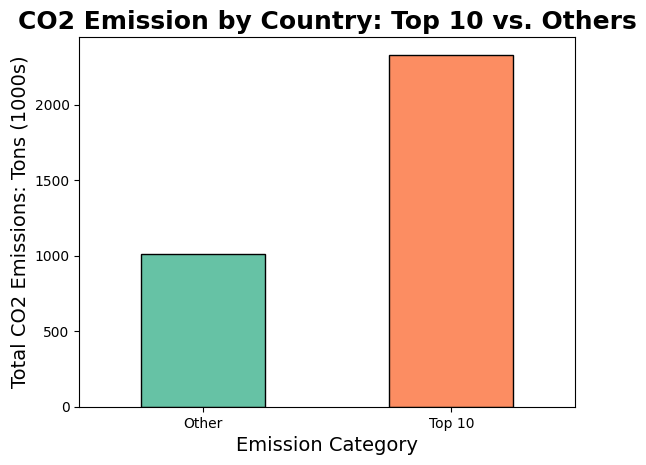

: 

In [ ]:
# Chi-Square: Top 10 countries by emission countries compare vs remaining countries
top_10 = global_country_info_df.sort_values(by='Co2-Emissions', ascending=False).head(10)
top_10_list = top_10['Country'].tolist()
global_country_info_df['EmissionCategory'] = global_country_info_df['Country'].apply(lambda x: 'Top 10' if x in top_10_list else 'Other')
merged_df = city_daily_temperature_df.merge(global_country_info_df[['Country', 'EmissionCategory']], on='Country', how='left')

merged_df['TempCategory'] = pd.cut(merged_df['AvgTemperature'], bins=[-np.inf, 10, 25, np.inf], labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(merged_df['TempCategory'], merged_df['EmissionCategory'])

# Chi Square Test Result Statistic
from scipy.stats import chi2_contingency
chi2, p, dof,expected = chi2_contingency(contingency_table)
print(f'p-value: {p}')

# Bar Plot comparing CO2 Emissions
emissions_sums = global_country_info_df.groupby('EmissionCategory')['Co2-Emissions'].sum()/10000
emissions_sums.plot(kind='bar', color=['#66c2a5', '#fc8d62'], edgecolor='black')

plt.title('CO2 Emission by Country: Top 10 vs. Others', fontsize=18, weight='bold')
plt.xlabel('Emission Category', fontsize=14)
plt.ylabel('Total CO2 Emissions: Tons (1000s)', fontsize=14)
plt.xticks(rotation=0)
plt.show()

    Summary of Chi-Square
    
Summary: Our null hypothesis is that the size of a country does not directly influence its Co2 emissions. Our alternate hypothesis is that the size of a country does directly influence its CO2 emissions. From our Chi-Square Analysis we can see a p-value of 0. Because of these results, we can safely assume to reject our null hypothesis and assume that there is a directy influence between our two variables, the top 10 countries and the remaining countries, with their CO2 emissions. Also, the top 10 countries make over double the Co2 emissions that the rest of the world combined does. From these findings, we can see that the top 10 countries greatly contribute to Co2 emissions, compared to the rest of the world.
***

### T-Test

p value = 0.13285391985389802


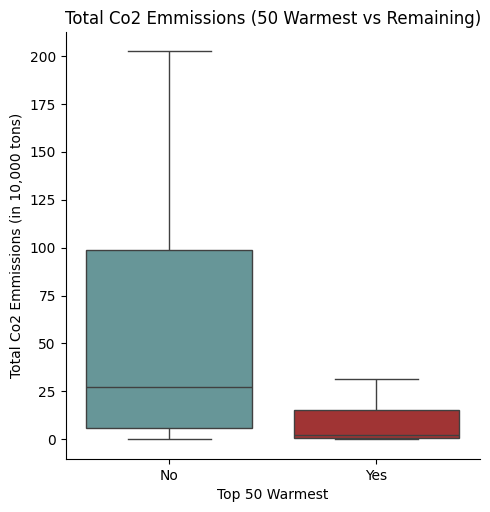

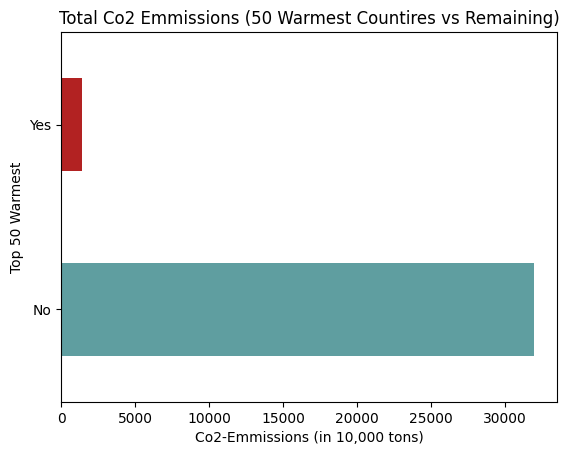

: 

In [ ]:
# T-Test: Comparing Co2-Emissions between Top 25 countries by average temperature and remaining countires
country_emissions_avgtemp_df = combined_yearly_df.groupby(['Co2-Emissions', 'Country'], as_index=False)['AverageTemperature'].mean()

top_25_countires = country_emissions_avgtemp_df.nlargest(50, 'AverageTemperature')
top_25_countires['Top 50 Warmest'] = 'Yes'
remaining_countires = country_emissions_avgtemp_df[~country_emissions_avgtemp_df.index.isin(top_25_countires.index)]
remaining_countires['Top 50 Warmest'] = 'No'
combined_emmissions = pd.concat([top_25_countires, remaining_countires], ignore_index=True)

top_10_countries_emmissions = top_25_countires['Co2-Emissions']
remaining_countries_emmissions = remaining_countires['Co2-Emissions']

t_stat, p_value = stats.ttest_ind(top_10_countries_emmissions, remaining_countries_emmissions)
print(f'p value = {p_value}')

combined_emmissions['Co2-Emissions'] /= 1000
sns.catplot(data=combined_emmissions.groupby(['Top 50 Warmest', 'Co2-Emissions'], as_index=False)['Co2-Emissions'].sum(), x='Top 50 Warmest', y='Co2-Emissions', kind='box', showfliers=False, hue='Top 50 Warmest', palette=['cadetblue', 'firebrick'])
plt.title('Total Co2 Emmissions (50 Warmest vs Remaining)')
plt.ylabel('Total Co2 Emmissions (in 10,000 tons)')
plt.show()

combined_emmissions.groupby('Top 50 Warmest')['Co2-Emissions'].sum().plot(kind='barh', title='Total Co2 Emmissions (50 Warmest Countires vs Remaining)', xlabel='Co2-Emmissions (in 10,000 tons)', ylabel='Top 50 Warmest', color=['cadetblue', 'firebrick'])
plt.show()

    T-Test Conclusion

$H_0:$ The top 50 countries by temperature contribute more to CO2 Emissions.

$H_A:$ The top 50 countries by temperature do not contribute more to CO2 Emissions.

I divided the countries into two categories: top 50 warmest and remaining. Using the T-Test, compared the emitted emissions by the top 50 warmest countries compared to the remaining countries and I obtained a p-value of 0.132, which is above the significance threshold of 0.05. This means we should fail to reject the null hypothesis since the observed data are not statistically significant enough to reject the null hypothesis.

Thus we conclude that the top 50 counties by temperature do not contribute more to CO2 Emmissions.

## And that concludes our testing! 

<div style="text-align: center;">
    <img src="https://64.media.tumblr.com/f2889ff527580e5ec5da514d21c3d66f/tumblr_inline_o5wez4GboI1rlw5h2_400.gif" width="550" />
</div>

## Our Regression Model 🖍️

In [ ]:
# Regression Preperation
country_dict = combined_yearly_df.groupby(['Country']).apply(lambda x: x.to_dict(orient='records'), include_groups=False).to_dict()

country_temp_change = {}
countries = []
avg_temp_percent_change = []
for k, v in country_dict.items():
    countries.append(k)
    max_year = max(v, key=lambda x: pd.to_datetime(x["Date"]).year)
    min_year = min(v, key=lambda x: pd.to_datetime(x["Date"]).year)
    temp_diff = 100 * ((max_year["AverageTemperature"] - min_year["AverageTemperature"]) / (pd.to_datetime(max_year["Date"]).year - pd.to_datetime(min_year["Date"]).year))
    avg_temp_percent_change.append(temp_diff)
country_temp_change["Country"] = countries
country_temp_change["Average Temperature Change (%)"] = avg_temp_percent_change
country_temp_change_df = pd.DataFrame(country_temp_change)
country_temp_change_df.index += 1
country_temp_change_df = pd.merge(country_temp_change_df, global_country_info_df, on="Country")

# Correlation matrix
corr = country_temp_change_df.drop(columns=["Country", "Capital/Major City", "Largest city", "EmissionCategory"]).corr()
corr.style.background_gradient(cmap='coolwarm')

,Average Temperature Change (%),Population,Urban_population,GDP,Land Area(Km2),Agricultural Land( %),Forested Area (%),Birth Rate,Infant mortality,Life expectancy,Co2-Emissions
Average Temperature Change (%),1.000000,-0.065887,-0.057821,-0.063779,0.150118,0.035410,-0.168232,0.299439,0.217344,-0.222956,-0.040102
Population,-0.065887,1.000000,0.954198,0.631589,0.444466,0.119502,-0.041359,-0.052085,0.007540,0.010129,0.809979
Urban_population,-0.057821,0.954198,1.000000,0.783944,0.545816,0.102935,-0.017746,-0.106961,-0.054387,0.071816,0.926261
GDP,-0.063779,0.631589,0.783944,1.000000,0.549427,0.053519,0.014133,-0.181484,-0.151663,0.177565,0.916761
Land Area(Km2),0.150118,0.444466,0.545816,0.549427,1.000000,-0.030313,0.005351,-0.066236,-0.065919,0.058868,0.590458
Agricultural Land( %),0.035410,0.119502,0.102935,0.053519,-0.030313,1.000000,-0.493491,0.171374,0.180139,-0.210545,0.064116
Forested Area (%),-0.168232,-0.041359,-0.017746,0.014133,0.005351,-0.493491,1.000000,-0.122956,-0.088709,0.068096,-0.014478
Birth Rate,0.299439,-0.052085,-0.106961,-0.181484,-0.066236,0.171374,-0.122956,1.000000,0.868357,-0.841986,-0.150749
Infant mortality,0.217344,0.007540,-0.054387,-0.151663,-0.065919,0.180139,-0.088709,0.868357,1.000000,-0.899582,-0.118910
Life expectancy,-0.222956,0.010129,0.071816,0.177565,0.058868,-0.210545,0.068096,-0.841986,-0.899582,1.000000,0.119329


: 

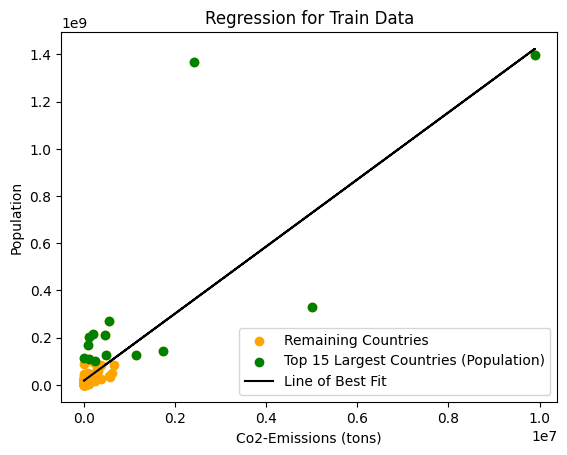

: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Regression Analysis
X = country_temp_change_df['Co2-Emissions'].values.reshape(-1, 1)
Y = country_temp_change_df['Population'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear_model = LinearRegression().fit(X_train, Y_train)

population_mask = Y_train > np.sort(Y_train, axis=0)[len(Y_train) - 15]#[int(2 * (len(Y_train) / 3))]# > country_temp_change_df['Population'].median()
plt.scatter(X_train, Y_train, color='orange', label='Remaining Countries')
plt.scatter(X_train[population_mask], Y_train[population_mask], color='green', label='Top 15 Largest Countries (Population)')
plt.plot(X_train, linear_model.predict(X_train), color='black', label='Line of Best Fit')
plt.title("Regression for Train Data")
plt.xlabel("Co2-Emissions (tons)")
plt.ylabel("Population")
plt.legend()
plt.show()

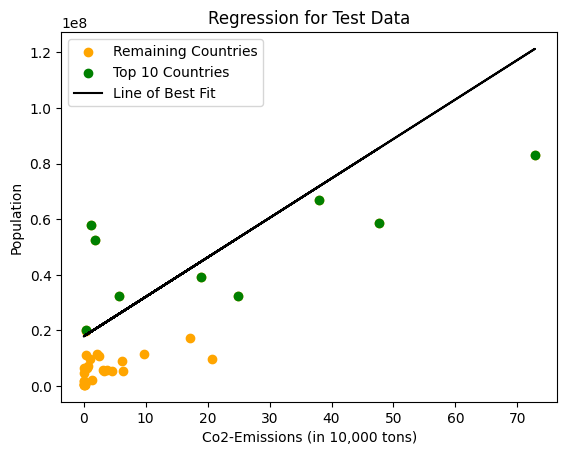

: 

In [ ]:
population_mask = Y_test > np.sort(Y_test, axis=0)[len(Y_test) - 10]
plt.scatter(X_test / 10000, Y_test, color='orange', label='Remaining Countries')
plt.scatter(X_test[population_mask] / 10000, Y_test[population_mask], color='green', label='Top 10 Countries')
plt.plot(X_test / 10000, linear_model.predict(X_test), color='black', label='Line of Best Fit')
plt.title("Regression for Test Data")
plt.xlabel("Co2-Emissions (in 10,000 tons)")
plt.ylabel("Population")
plt.legend()
plt.show()

Based on the line of best fit, we see there is a strong correlation between Co2 Emissions and Population sizes. Thus we can conclude that Countries with larger populations have a greater contribution to Co2 Emissions and thus impact the environment more.

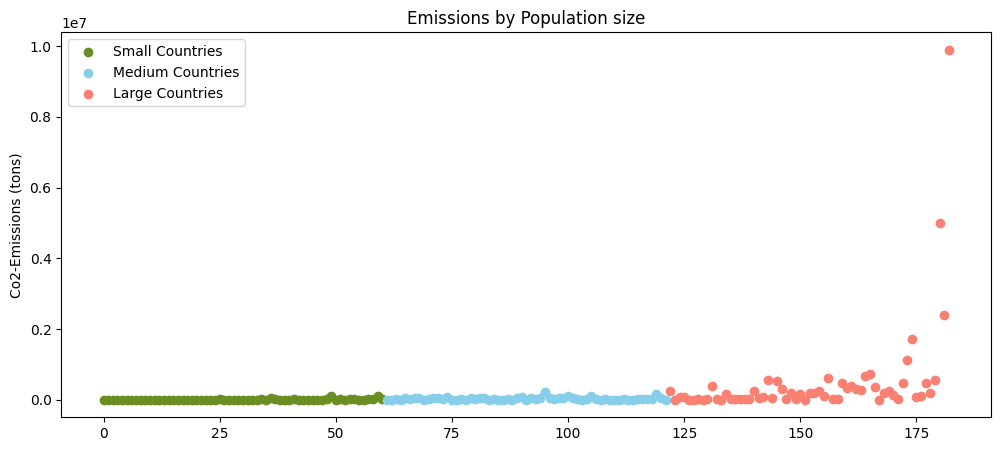

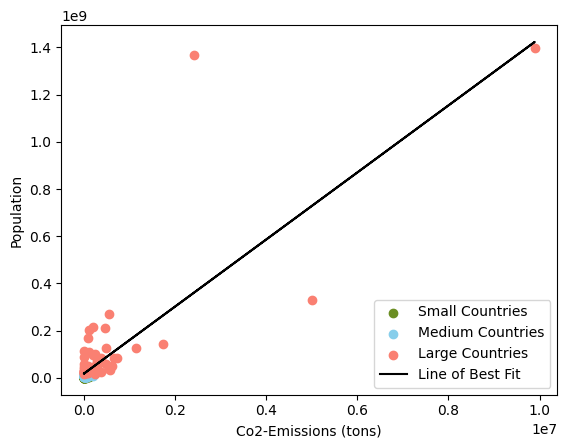

: 

In [ ]:
# Regression Visualization

# Label countryes by population size (Small/Medium/Large)
sorted_populations = country_temp_change_df.sort_values(by='Population').reset_index()
num_countries = sorted_populations.shape[0]
first_third = int(num_countries / 3)
second_thrid = int(2 * (num_countries / 3))
small_countries = sorted_populations[:first_third]
medium_countries = sorted_populations[first_third:second_thrid]
large_countries = sorted_populations[second_thrid:]

plt.figure(figsize=(12,5))
plt.scatter(small_countries.index, small_countries['Co2-Emissions'], color='olivedrab', label='Small Countries')
plt.scatter(medium_countries.index, medium_countries['Co2-Emissions'], color='skyblue', label='Medium Countries')
plt.scatter(large_countries.index, large_countries['Co2-Emissions'], color='salmon', label='Large Countries')
plt.title("Emissions by Population size")
plt.xlabel("")
plt.ylabel("Co2-Emissions (tons)")
plt.legend()
plt.show()

plt.scatter(small_countries['Co2-Emissions'], small_countries['Population'], color='olivedrab', label='Small Countries')
plt.scatter(medium_countries['Co2-Emissions'], medium_countries['Population'], color='skyblue', label='Medium Countries')
plt.scatter(large_countries['Co2-Emissions'], large_countries['Population'], color='salmon', label='Large Countries')
plt.plot(country_temp_change_df['Co2-Emissions'], linear_model.predict(country_temp_change_df['Co2-Emissions'].values.reshape(-1, 1)), color='black', label='Line of Best Fit')
plt.xlabel("Co2-Emissions (tons)")
plt.ylabel("Population")
plt.legend()
plt.show()


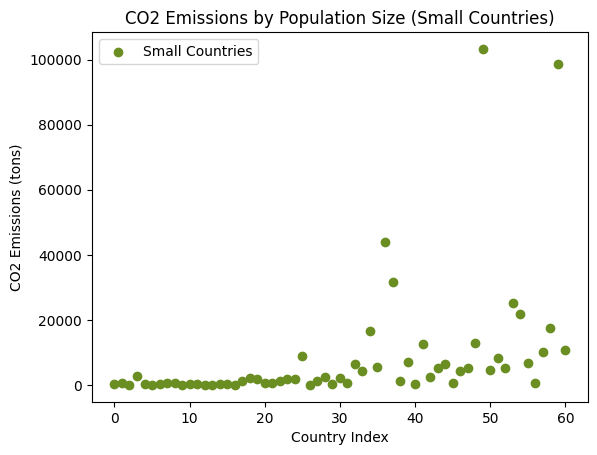

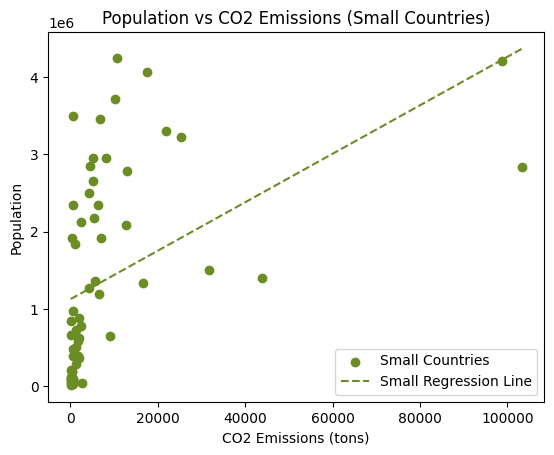

: 

In [ ]:
#Visualization of just small countries
plt.scatter(small_countries.index, small_countries['Co2-Emissions'], color='olivedrab', label='Small Countries')
plt.title("CO2 Emissions by Population Size (Small Countries)")
plt.xlabel("Country Index")
plt.ylabel("CO2 Emissions (tons)")
plt.legend()
plt.show()

plt.scatter(small_countries['Co2-Emissions'], small_countries['Population'], color='olivedrab', label='Small Countries')

small_model = LinearRegression()
small_X = small_countries['Co2-Emissions'].values.reshape(-1, 1)
small_y = (small_countries['Population']).values.reshape(-1, 1)
small_model.fit(small_X, small_y)
small_x_range = np.linspace(small_X.min(), small_X.max(), 100).reshape(-1, 1)
plt.plot(small_x_range, small_model.predict(small_x_range), color='olivedrab', linestyle='--', label='Small Regression Line')
plt.xlabel("CO2 Emissions (tons)")
plt.ylabel("Population")
plt.legend()
plt.title("Population vs CO2 Emissions (Small Countries)")
plt.show()

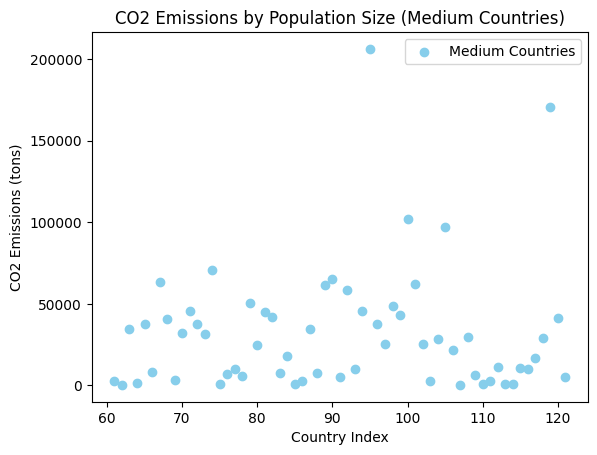

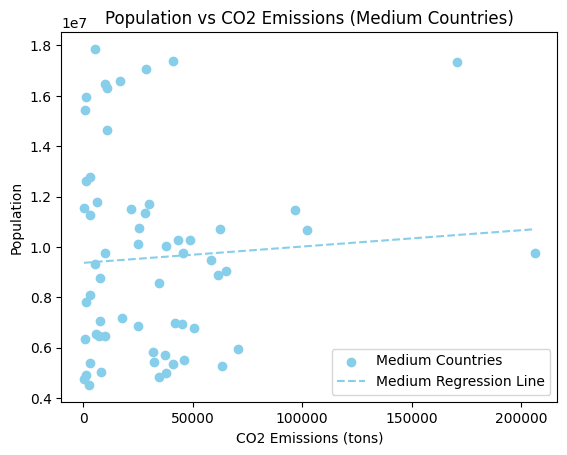

: 

In [ ]:
#Visualization of just medium countries
plt.scatter(medium_countries.index, medium_countries['Co2-Emissions'], color='skyblue', label='Medium Countries')
plt.title("CO2 Emissions by Population Size (Medium Countries)")
plt.xlabel("Country Index")
plt.ylabel("CO2 Emissions (tons)")
plt.legend()
plt.show()

plt.scatter(medium_countries['Co2-Emissions'], medium_countries['Population'], color='skyblue', label='Medium Countries')

medium_model = LinearRegression()
medium_X = medium_countries['Co2-Emissions'].values.reshape(-1, 1)
medium_y = medium_countries['Population'].values.reshape(-1, 1)
medium_model.fit(medium_X, medium_y)
medium_x_range = np.linspace(medium_X.min(), medium_X.max(), 100).reshape(-1, 1)
plt.plot(medium_x_range, medium_model.predict(medium_x_range), color='skyblue', linestyle='--', label='Medium Regression Line')
plt.xlabel("CO2 Emissions (tons)")
plt.ylabel("Population")
plt.legend()
plt.title("Population vs CO2 Emissions (Medium Countries)")
plt.show()

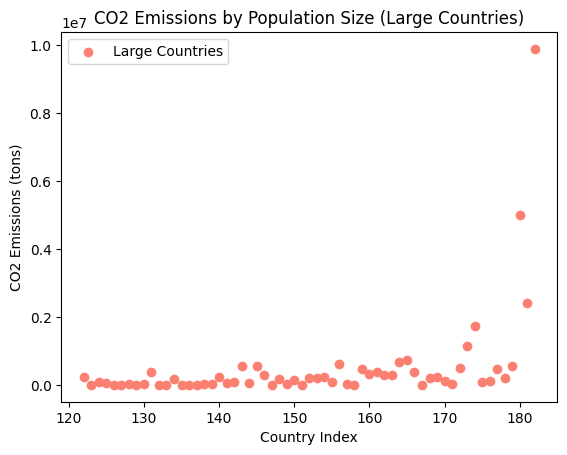

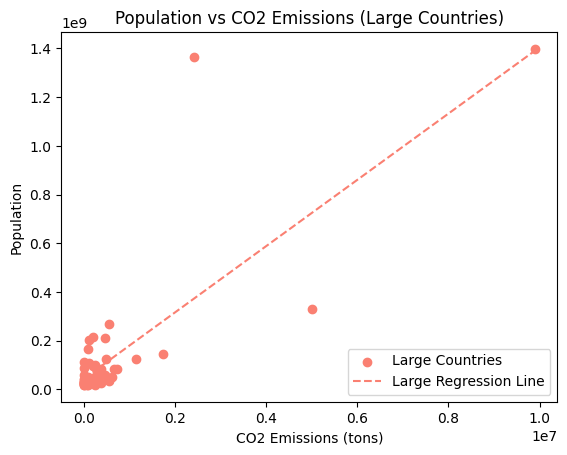

: 

In [ ]:
#Visualization of just large countries
plt.scatter(large_countries.index, large_countries['Co2-Emissions'], color='salmon', label='Large Countries')
plt.title("CO2 Emissions by Population Size (Large Countries)")
plt.xlabel("Country Index")
plt.ylabel("CO2 Emissions (tons)")
plt.legend()
plt.show()

plt.scatter(large_countries['Co2-Emissions'], large_countries['Population'], color='salmon', label='Large Countries')

large_model = LinearRegression()
large_X = large_countries['Co2-Emissions'].values.reshape(-1, 1)
large_y = large_countries['Population'].values.reshape(-1, 1)
large_model.fit(large_X, large_y)
large_x_range = np.linspace(large_X.min(), large_X.max(), 100).reshape(-1, 1)
plt.plot(large_x_range, large_model.predict(large_x_range), color='salmon', linestyle='--', label='Large Regression Line')
plt.xlabel("CO2 Emissions (tons)")
plt.ylabel("Population")
plt.legend()
plt.title("Population vs CO2 Emissions (Large Countries)")
plt.show()

# Analysis, Conclusion and Insights 🔥

## Analysis 🤓

From our data exploration, we find many things. We see from both the training and test datasets that there is a linear correlation between population size and Co2-emissions. The largest populations dominate the regression line, which suggest that they skew global data trends. 

By looking at countries by size, we see some sizable results. Small countries emit pretty low levels of Co2-emissions, however there are a few exceptions of small countries contributing significantly more emisisons than most. Medium sized countries vary in their emissions, and large countries show sharp increases in emissions relative to population. A few of the large countries account for a huge portion of global Co2-emissions, which highlights their extreme role in climate trends. The data heavily supports the idea that these countries with large populations are often heavy Co2-emitters, which can be due to their high demands of energy, reliance on fossil fuels, and other economic and environmental reasons. However, it cannot be assumed that population size is the only factor, as countries with advanced economies, different governments, and other factors can be influencing variables. 

In summary, China, the US, Russia, India, and Japan are the top 5 biggest contributors to increasing global temperatures. Population and emissions are two of the most significant factors to whether or not a country plays a role in global warming. 


<div style="text-align: center;">
    <img src="https://64.media.tumblr.com/a584b03740e84c4ec9abfbd017aaa11b/tumblr_n9mxi7BH3A1saxoooo2_500.gif" width="600" />
</div>



## Conclusion and Insights 🔮

In conclusion, it is shown through evidence that countries with large populations tend to have heavy Co2-emissions and are most responsible for climate change. In general, small and medium sized countries contribute less emissions, and thus are less relevant to climate trends. We hope that through this project, we have shown and highlighted how leveraging data and exploring it can lead to some insightful revelations about global climate trends. Understanding climate change and where it comes from, grants us one step closer to solving this global environment crisis!

<div style="text-align: center;">
    <img src="https://media.tenor.com/LiDD5Bl5AXEAAAAM/spongebob-the.gif" width="800" />
</div>